In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path="/content/drive/MyDrive/Colab Notebooks/deep learning/credit card customer churn prediction/Churn_Modelling.csv"
df1=pd.read_csv(file_path)

In [3]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df1.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df1['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df1['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
print(df1['HasCrCard'].unique())
print(df1['IsActiveMember'].unique())
print(df1['NumOfProducts'].unique())

[1 0]
[1 0]
[1 3 2 4]


In [10]:
df=pd.get_dummies(df1,columns=['Geography','Gender'],dtype=int)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [14]:
numeric_columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
X_train[numeric_columns].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
4989,629,40,9,0.00,1,106.67
4498,570,30,2,131406.56,1,47952.45
8876,556,46,3,131764.96,1,108500.66
670,624,48,3,122388.38,2,30020.09
9552,664,41,5,0.00,1,152054.33


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train[numeric_columns])
X_train_trf=X_train.copy()
X_test_trf=X_test.copy()
X_train_trf[numeric_columns]=scaler.transform(X_train[numeric_columns])
X_test_trf[numeric_columns]=scaler.transform(X_test[numeric_columns])

In [16]:
X_train_trf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4989,-0.224828,0.099845,1.377789,-1.234331,-0.906787,1,0,-1.736747,1,0,0,0,1
4498,-0.835785,-0.848578,-1.037266,0.874085,-0.906787,1,1,-0.905804,1,0,0,0,1
8876,-0.980758,0.668899,-0.692259,0.879836,-0.906787,1,1,0.145744,0,0,1,0,1
670,-0.276604,0.858584,-0.692259,0.729389,0.808987,0,0,-1.217237,0,1,0,1,0
9552,0.137604,0.194688,-0.002243,-1.234331,-0.906787,1,1,0.902146,1,0,0,1,0


In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [18]:
model=Sequential()

model.add(Dense(8,activation='relu',input_dim=X_train_trf.shape[1]))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 143 (572.00 Byte)
Trainable params: 143 (572.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit(X_train_trf,y_train,batch_size=30,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
214/214 [==============================] - 3s 4ms/step - loss: 0.5073 - accuracy: 0.7947 - val_loss: 0.4794 - val_accuracy: 0.7894
Epoch 2/100
214/214 [==============================] - 1s 4ms/step - loss: 0.4410 - accuracy: 0.7987 - val_loss: 0.4577 - val_accuracy: 0.7887
Epoch 3/100
214/214 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.7992 - val_loss: 0.4481 - val_accuracy: 0.7881
Epoch 4/100
214/214 [==============================] - 2s 8ms/step - loss: 0.4122 - accuracy: 0.7998 - val_loss: 0.4410 - val_accuracy: 0.7912
Epoch 5/100
214/214 [==============================] - 2s 11ms/step - loss: 0.4035 - accuracy: 0.8045 - val_loss: 0.4300 - val_accuracy: 0.7969
Epoch 6/100
214/214 [==============================] - 2s 8ms/step - loss: 0.3944 - accuracy: 0.8109 - val_loss: 0.4183 - val_accuracy: 0.8012
Epoch 7/100
214/214 [==============================] - 2s 8ms/step - loss: 0.3848 - accuracy: 0.8156 - val_loss: 0.4109 - val_accuracy: 0.808

In [21]:
y_pred=model.predict(X_test_trf)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.6399511 ],
       [0.06293751],
       [0.01800851],
       ...,
       [0.14928593],
       [0.25411063],
       [0.06516052]], dtype=float32)

In [22]:
y_pred1=np.where(y_pred > 0.50, 1, 0)[:, 0]
y_pred1

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.861

In [24]:
import matplotlib.pyplot as plt


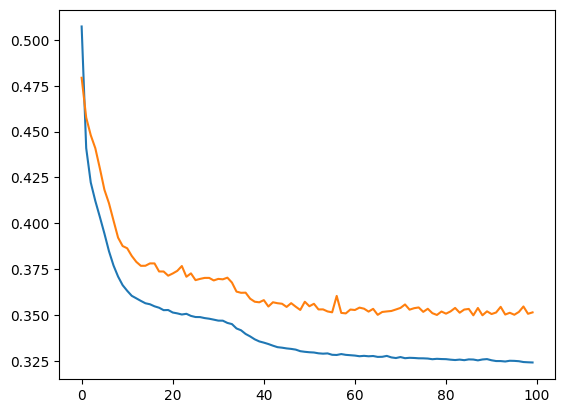

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

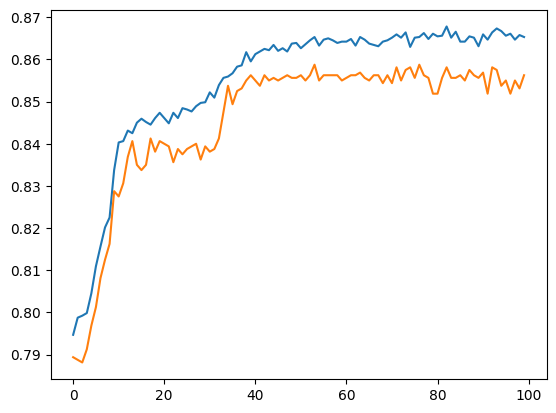

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])